In [ ]:
import pandas as pd


In [2]:
train_df = pd.read_csv('train.csv', on_bad_lines = 'skip', parse_dates=['time'])

In [3]:
train_df = train_df[train_df['incident'].notna()]

In [4]:
train_df['incident'].value_counts()

incident
0.0    12359
1.0       83
Name: count, dtype: int64

In [ ]:
df_filtered['incident'] = train_df['incident']

NameError: name 'df_filtered' is not defined

In [8]:
constant_columns = [col for col in train_df.columns if train_df[col].nunique() <= 1]
df_filtered = train_df.drop(columns=constant_columns)

In [9]:
df_filtered

,time,node_arp_entries,node_boot_time_seconds,node_context_switches_total,node_cpu_seconds_total,node_disk_io_now,node_disk_io_time_seconds_total,node_disk_io_time_weighted_seconds_total,node_disk_read_bytes_total,node_disk_read_time_seconds_total,...,process_resident_memory_bytes,process_start_time_seconds,process_virtual_memory_bytes,promhttp_metric_handler_requests_total,scrape_duration_seconds,scrape_samples_post_metric_relabeling,scrape_samples_scraped,scrape_series_added,up,incident
0,2024-10-17 14:01:26,9.0,1.729171e+09,1.555459e+07,340.204792,0.000000,338.209167,2182.798667,6.305707e+08,780.598333,...,20393984.0,1.729171e+09,744292352.0,7.333333,0.050,852.0,852.0,0.0,1.0,0.0
1,2024-10-17 14:03:26,9.0,1.729171e+09,1.622989e+07,355.186562,0.000000,344.798000,2214.357167,6.305841e+08,780.709167,...,21118976.0,1.729171e+09,744292352.0,7.666667,0.045,852.0,852.0,0.0,1.0,0.0
2,2024-10-17 14:05:26,9.0,1.729171e+09,1.698642e+07,370.167083,0.000000,348.365167,2227.354333,6.305854e+08,780.716000,...,21557248.0,1.729171e+09,744292352.0,8.000000,0.044,852.0,852.0,0.0,1.0,0.0
3,2024-10-17 14:07:26,10.0,1.729171e+09,1.758117e+07,385.154479,0.833333,350.594333,2238.202333,6.305909e+08,780.729333,...,21590016.0,1.729171e+09,744292352.0,8.333333,0.044,853.0,853.0,1.0,1.0,0.0
4,2024-10-17 14:09:26,10.0,1.729171e+09,1.842578e+07,400.134583,0.000000,355.973333,2264.278000,6.305909e+08,780.729333,...,20951040.0,1.729171e+09,744292352.0,8.666667,0.046,853.0,853.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12438,2024-11-04 08:17:26,13.0,1.729602e+09,1.070283e+10,138051.711953,0.000000,50432.292500,451620.042333,1.368910e+10,12960.497833,...,16969728.0,1.729602e+09,745078784.0,3072.000000,0.043,924.0,924.0,0.0,1.0,0.0
12439,2024-11-04 08:19:26,13.0,1.729602e+09,1.070445e+10,138066.683906,0.000000,50435.826667,451643.034333,1.368910e+10,12960.497833,...,16830464.0,1.729602e+09,745078784.0,3072.333333,0.043,924.0,924.0,0.0,1.0,0.0
12440,2024-11-04 08:21:26,13.0,1.729602e+09,1.070602e+10,138081.653516,0.000000,50441.282500,451691.545500,1.368910e+10,12960.497833,...,15233024.0,1.729602e+09,745078784.0,3072.666667,0.041,924.0,924.0,0.0,1.0,0.0
12441,2024-11-04 08:23:26,13.0,1.729602e+09,1.070739e+10,138096.630234,0.000000,50444.836167,451714.194667,1.368912e+10,12960.574833,...,16109568.0,1.729602e+09,745078784.0,3073.000000,0.047,925.0,925.0,1.0,1.0,0.0


In [10]:
df_filtered['incident'].value_counts(normalize=True) * 100

incident
0.0    99.332905
1.0     0.667095
Name: proportion, dtype: float64

In [11]:
numeric_df = df_filtered.select_dtypes(include=['number'])

correlations = numeric_df.corr()['incident'].drop('incident')

correlations_sorted = correlations.abs().sort_values(ascending=False)

top_features = correlations_sorted.head(10)
top_features

node_udp_queues                0.202898
node_load1                     0.201241
node_load5                     0.165381
node_memory_Dirty_bytes        0.152623
node_load15                    0.119949
node_memory_Writeback_bytes    0.102645
node_disk_io_now               0.062513
node_memory_Mapped_bytes       0.061067
node_sockstat_TCP_tw           0.054177
node_sockstat_UDP_mem          0.050966
Name: incident, dtype: float64

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

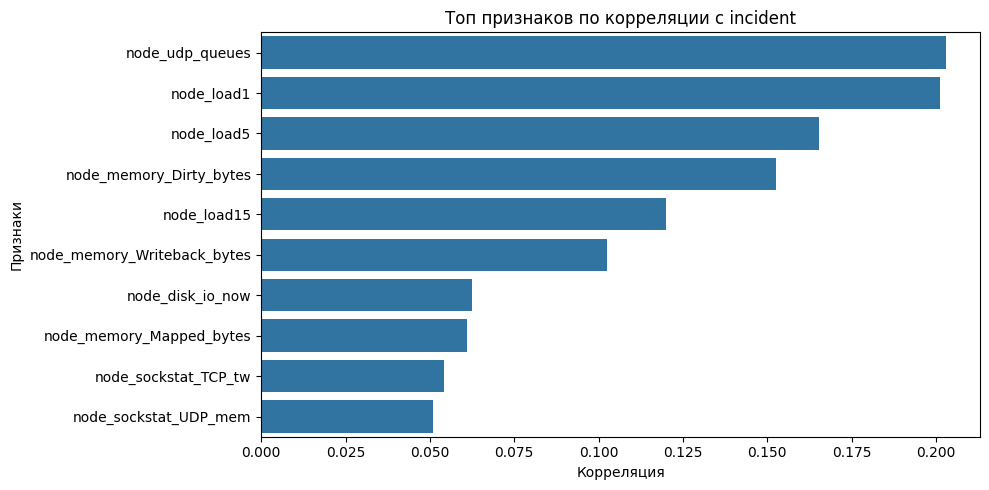

In [13]:
plt.figure(figsize=(10, 5))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Топ признаков по корреляции с incident")
plt.xlabel("Корреляция")
plt.ylabel("Признаки")
plt.tight_layout()
plt.show()

In [23]:
train_df['node_udp_queues'].value_counts()

node_udp_queues
0.00        12348
192.00         41
576.00         12
768.00          7
384.00          6
1344.00         4
1728.00         3
1920.00         2
960.00          2
1536.00         2
53376.00        2
2496.00         2
2304.00         1
2880.00         1
21888.00        1
2112.00         1
40896.00        1
0.25            1
18048.00        1
13824.00        1
Name: count, dtype: int64

In [34]:
train_df[['incident', 'node_udp_queues']][(train_df['incident'] == 1)]

,incident,node_udp_queues
470,1.0,0.0
492,1.0,0.0
524,1.0,0.0
528,1.0,0.0
530,1.0,0.0
...,...,...
10640,1.0,0.0
11226,1.0,1344.0
11346,1.0,0.0
11372,1.0,0.0


проверяла, как удаление столбцов с преобладающими нулевыми значениями повлияет на метрики. повлияло неочень, лучше оставить эти столбы


In [14]:
threshold = 0.9

zero_fraction = (train_df == 0).sum() / len(train_df)

columns_to_drop = zero_fraction[zero_fraction > threshold].index.tolist()

df_filtered = train_df.drop(columns=columns_to_drop)

print(f"Удалено {len(columns_to_drop)} столбцов с долей нулей > {threshold*100:.0f}%")

Удалено 98 столбцов с долей нулей > 90%


In [18]:
constant_columns = [col for col in df_filtered.columns if df_filtered[col].nunique() <= 1]
df_filtered = df_filtered.drop(columns=constant_columns)

In [19]:
df_filtered

,time,node_arp_entries,node_boot_time_seconds,node_context_switches_total,node_cpu_seconds_total,node_disk_io_now,node_disk_io_time_seconds_total,node_disk_io_time_weighted_seconds_total,node_disk_read_bytes_total,node_disk_read_time_seconds_total,...,process_resident_memory_bytes,process_start_time_seconds,process_virtual_memory_bytes,promhttp_metric_handler_requests_total,scrape_duration_seconds,scrape_samples_post_metric_relabeling,scrape_samples_scraped,scrape_series_added,up,incident
0,2024-10-17 14:01:26,9.0,1.729171e+09,1.555459e+07,340.204792,0.000000,338.209167,2182.798667,6.305707e+08,780.598333,...,20393984.0,1.729171e+09,744292352.0,7.333333,0.050,852.0,852.0,0.0,1.0,0.0
1,2024-10-17 14:03:26,9.0,1.729171e+09,1.622989e+07,355.186562,0.000000,344.798000,2214.357167,6.305841e+08,780.709167,...,21118976.0,1.729171e+09,744292352.0,7.666667,0.045,852.0,852.0,0.0,1.0,0.0
2,2024-10-17 14:05:26,9.0,1.729171e+09,1.698642e+07,370.167083,0.000000,348.365167,2227.354333,6.305854e+08,780.716000,...,21557248.0,1.729171e+09,744292352.0,8.000000,0.044,852.0,852.0,0.0,1.0,0.0
3,2024-10-17 14:07:26,10.0,1.729171e+09,1.758117e+07,385.154479,0.833333,350.594333,2238.202333,6.305909e+08,780.729333,...,21590016.0,1.729171e+09,744292352.0,8.333333,0.044,853.0,853.0,1.0,1.0,0.0
4,2024-10-17 14:09:26,10.0,1.729171e+09,1.842578e+07,400.134583,0.000000,355.973333,2264.278000,6.305909e+08,780.729333,...,20951040.0,1.729171e+09,744292352.0,8.666667,0.046,853.0,853.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12438,2024-11-04 08:17:26,13.0,1.729602e+09,1.070283e+10,138051.711953,0.000000,50432.292500,451620.042333,1.368910e+10,12960.497833,...,16969728.0,1.729602e+09,745078784.0,3072.000000,0.043,924.0,924.0,0.0,1.0,0.0
12439,2024-11-04 08:19:26,13.0,1.729602e+09,1.070445e+10,138066.683906,0.000000,50435.826667,451643.034333,1.368910e+10,12960.497833,...,16830464.0,1.729602e+09,745078784.0,3072.333333,0.043,924.0,924.0,0.0,1.0,0.0
12440,2024-11-04 08:21:26,13.0,1.729602e+09,1.070602e+10,138081.653516,0.000000,50441.282500,451691.545500,1.368910e+10,12960.497833,...,15233024.0,1.729602e+09,745078784.0,3072.666667,0.041,924.0,924.0,0.0,1.0,0.0
12441,2024-11-04 08:23:26,13.0,1.729602e+09,1.070739e+10,138096.630234,0.000000,50444.836167,451714.194667,1.368912e+10,12960.574833,...,16109568.0,1.729602e+09,745078784.0,3073.000000,0.047,925.0,925.0,1.0,1.0,0.0


In [20]:
df_filtered['incident'] = train_df['incident']

df_filtered['incident'].value_counts(normalize=True) * 100

incident
0.0    99.332905
1.0     0.667095
Name: proportion, dtype: float64

In [21]:
numeric_df = df_filtered.select_dtypes(include=['number'])

correlations = numeric_df.corr()['incident'].drop('incident')

correlations_sorted = correlations.abs().sort_values(ascending=False)

top_features = correlations_sorted.head(10)
top_features

node_load1                     0.201241
node_load5                     0.165381
node_memory_Dirty_bytes        0.152623
node_load15                    0.119949
node_memory_Writeback_bytes    0.102645
node_disk_io_now               0.062513
node_memory_Mapped_bytes       0.061067
node_sockstat_TCP_tw           0.054177
node_sockstat_UDP_mem          0.050966
node_sockstat_UDP_mem_bytes    0.050966
Name: incident, dtype: float64

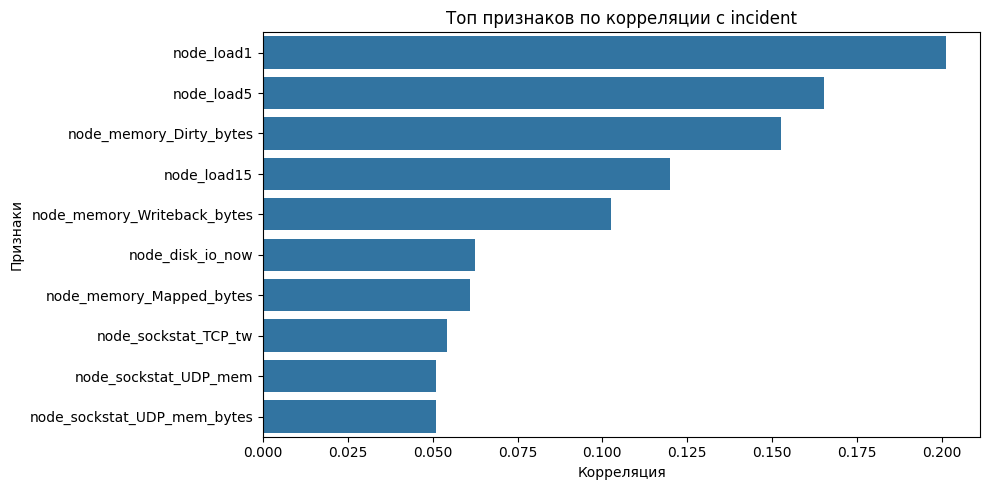

In [22]:
plt.figure(figsize=(10, 5))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Топ признаков по корреляции с incident")
plt.xlabel("Корреляция")
plt.ylabel("Признаки")
plt.tight_layout()
plt.show()